In [121]:
%matplotlib notebook
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
import csv
import math

In [122]:
df = pd.read_csv('../cerroNegro_regGrid_noWind_SOURCE.txt',sep=" ", header=0)

df = df.dropna(axis=1, how='all')
df = df.fillna(0)
df = df.rename(columns={'#Easting': 'Easting'})
display(df)

,Easting,Northing,Elev.,Mass/Area,[-4->-3),[-3->-2),[-2->-1),[-1->0),[0->1),[1->2),[2->3),[3->4)
0,482290,1332690,350,1.400000e-44,0.0,0.0,0.0,0.0,0.000000e+00,6.600000e-191,1.200000e-98,100.0
1,482290,1334190,350,2.400000e-43,0.0,0.0,0.0,0.0,0.000000e+00,3.500000e-185,1.200000e-95,100.0
2,482290,1335690,350,3.800000e-42,0.0,0.0,0.0,0.0,0.000000e+00,1.200000e-179,8.900000e-93,100.0
3,482290,1337190,350,5.500000e-41,0.0,0.0,0.0,0.0,0.000000e+00,2.900000e-174,5.500000e-90,100.0
4,482290,1338690,350,7.200000e-40,0.0,0.0,0.0,0.0,0.000000e+00,4.500000e-169,2.800000e-87,100.0
5,482290,1340190,350,8.800000e-39,0.0,0.0,0.0,0.0,0.000000e+00,4.700000e-164,1.100000e-84,100.0
6,482290,1341690,350,9.700000e-38,0.0,0.0,0.0,0.0,0.000000e+00,3.300000e-159,3.800000e-82,100.0
7,482290,1343190,350,9.900000e-37,0.0,0.0,0.0,0.0,0.000000e+00,1.600000e-154,1.000000e-79,100.0
8,482290,1344690,350,9.300000e-36,0.0,0.0,0.0,0.0,0.000000e+00,5.000000e-150,2.300000e-77,100.0
9,482290,1346190,350,8.000000e-35,0.0,0.0,0.0,0.0,1.900000e-282,1.000000e-145,4.000000e-75,100.0


In [123]:
phis = [
    '[-4->-3)',
    '[-3->-2)',
    '[-2->-1)',
    '[-1->0)',
    '[0->1)',
    '[1->2)',
    '[2->3)',
    '[3->4)',
]

xx = df['Easting'].values
yy = df['Northing'].values
ma = df['Mass/Area'].values


phi_z = []
phi_mass = []
for i, p in enumerate(phis):
    phi_z.append(df[p].values)
    phi_z[i] = phi_z[i]
    phi_z[i] = phi_z[i] + 0.000000000000000000001
    
    phi_mass.append(df[p].values)
    phi_mass[i] = phi_mass[i]*ma
    phi_mass[i] = phi_mass[i] + 0.000000000000000000001

x_0, y_0 = 532290, 1382690

<IPython.core.display.Javascript object>


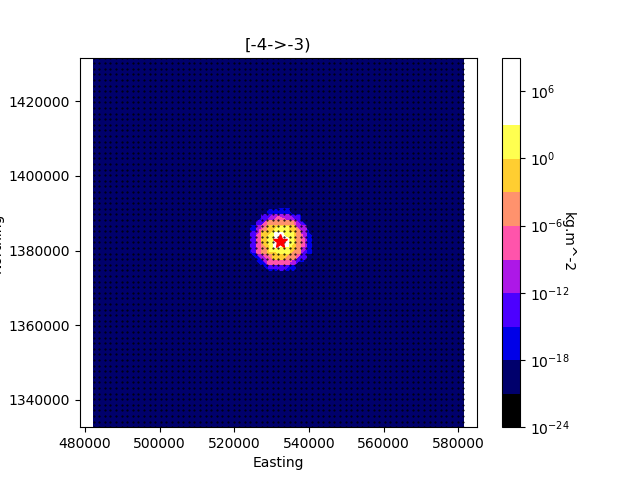

<IPython.core.display.Javascript object>


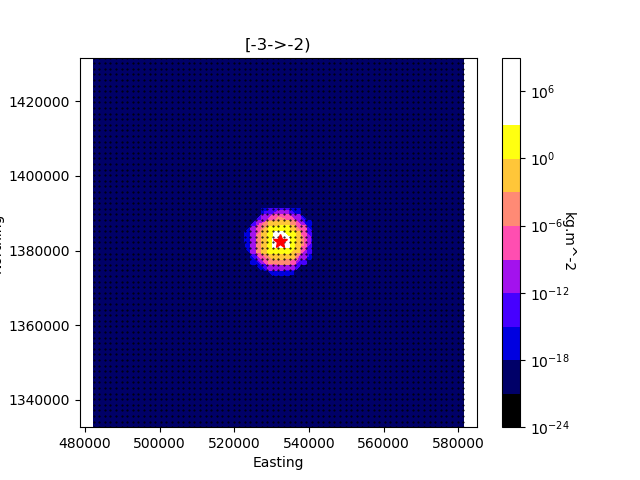

<IPython.core.display.Javascript object>


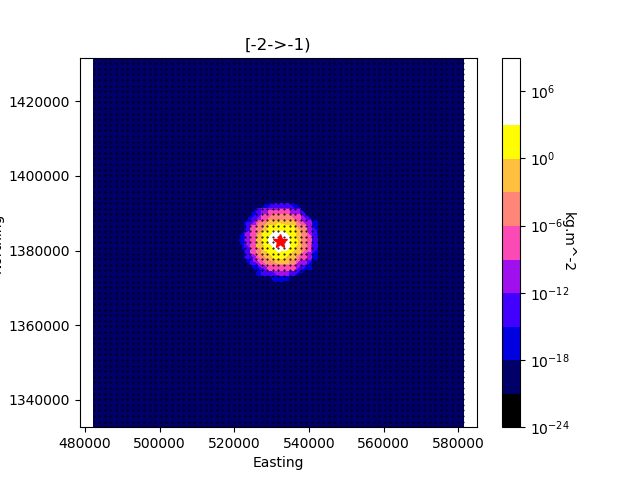

<IPython.core.display.Javascript object>


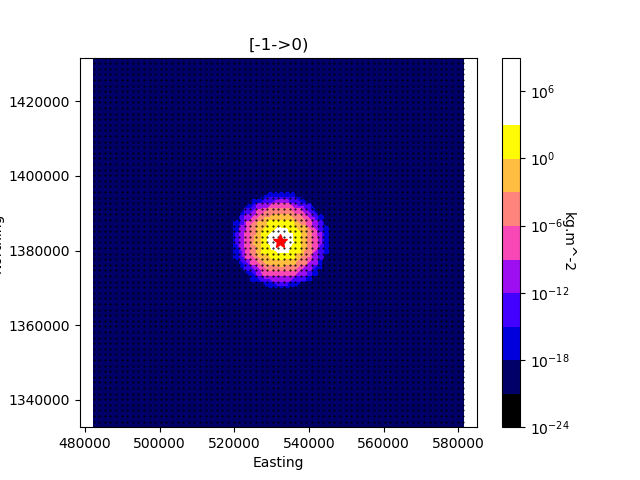

<IPython.core.display.Javascript object>


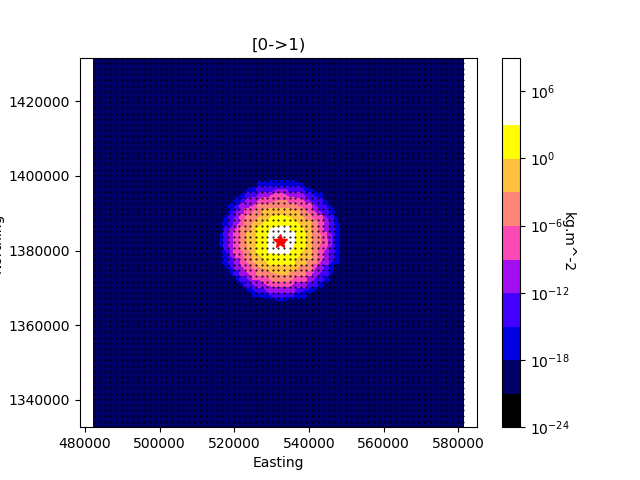

<IPython.core.display.Javascript object>


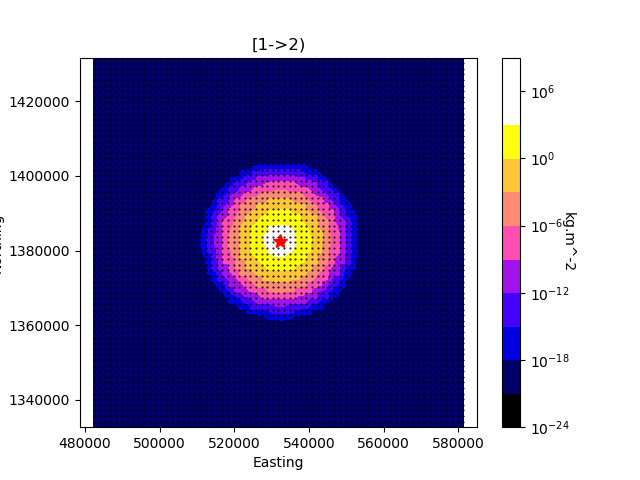

<IPython.core.display.Javascript object>


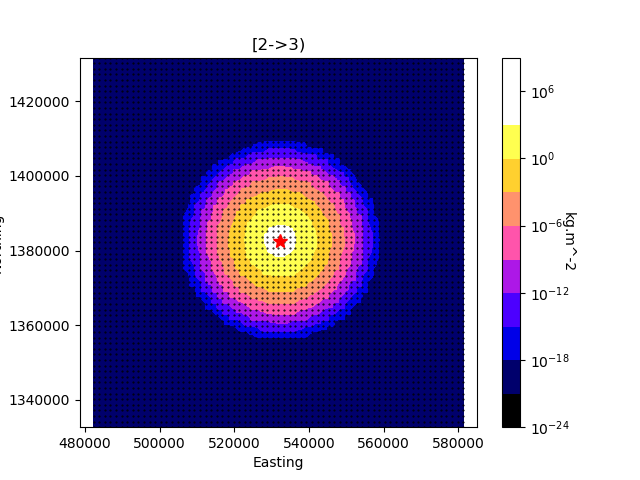

<IPython.core.display.Javascript object>


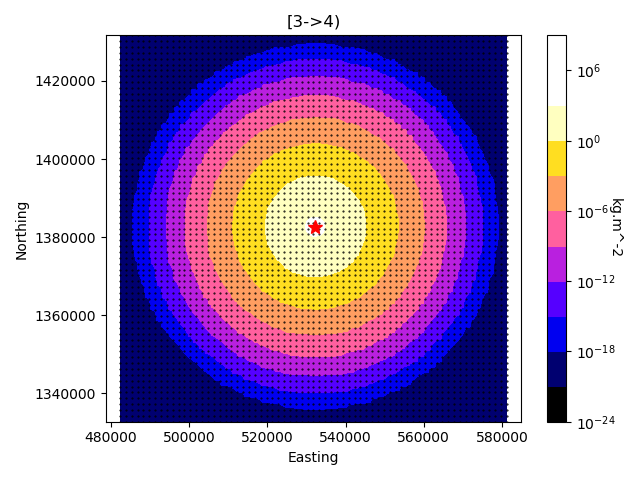

In [124]:
for i, phi in enumerate(phi_mass):
    plt.figure()
    plt.ylabel("Northing")
    plt.xlabel("Easting")
    plt.title(phis[i])
    contour = plt.tricontourf(xx, yy, phi, cmap='gnuplot2',norm=LogNorm(vmin=phi.min(), vmax=phi.max()));
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('kg.m^-2', rotation=270)
    plt.axis('equal')
    plt.plot(xx, yy, 'ko', ms=0.5)
    plt.plot(x_0, y_0, 'r*', ms=10)
#     plt.savefig('cerroNegro_regGrid_constNE_SOURCE_mass'+str(phis[i])+'.png')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


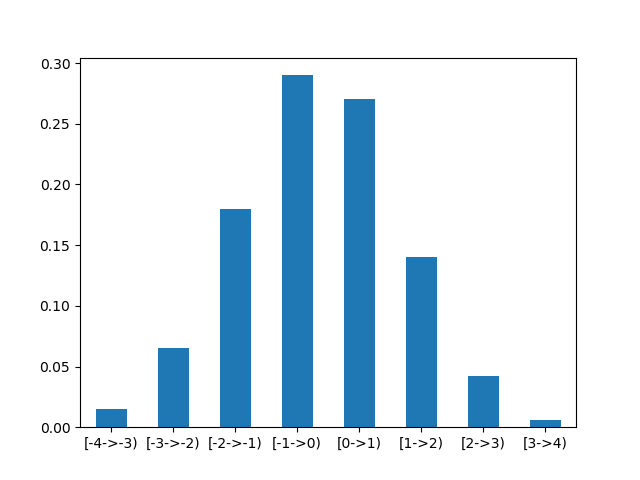

In [119]:
df1 = df.loc[lambda df: df.Easting == 533290]
point = df1.loc[lambda df1: df1.Northing == 1382190]
point[point.columns[4:]]

phi_vals = point[phis].transpose()
phi_vals = phi_vals/100
phi_vals.plot(kind='bar', rot=0, legend=False)


In [217]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

df1 = df.sample(frac=0.05, replace=False)
df2 = df.iloc[::5, :]

xx = list(set(df1['Easting'].values))
yy = list(set(df1['Northing'].values))
xx.sort()
yy.sort()
print(xx[1] - xx[0])
print(yy[1] - yy[0])


# xU, xL = x + 0.5, x - 0.5 
# prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
# prob = prob / prob.sum() #normalize the probabilities so their sum is 1
# nums = np.random.choice(x, size = 10000, p = prob)
# plt.figure()
# plt.hist(nums, bins = len(x))
# plt.show()

# plt.figure()
# plt.plot(xx, yy, 'ko', ms=1)
# plt.show()

1500
1500


0.05399096651318806